In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# TRUE DATA

In [27]:
file_path = '2020_LER_20201021_testset.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [232, 289, 277, 253, 255, 250, 250, 250] 
num_of_cycle = 8
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(2056, 5) (2056, 6) (8, 5) (8, 6)

!! check !! test real shape (2056, 6)
!! check !! X value ( especially its precision )

[  0.62484672  17.00743225 173.85718891   1.           0.        ]
[ 0.55654727 80.91905766 80.56986979  1.          0.        ]
[ 0.50466944 48.62398816 67.99380535  1.          0.        ]
[ 0.56045148 25.42868151 69.39740975  1.          0.        ]
[ 0.63730798 69.14860261 65.33037708  1.          0.        ]
[ 0.15273618 23.32639122 51.25326965  1.          0.        ]
[ 0.25925637 78.12653757 28.08679576  1.          0.        ]
[1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


# GENERATED DATA
### Please put your sampled data file(in .npy) in the same directory

In [28]:
########################################  CHANGE HERE ####################################################################

result = 'test_specificdate_201028_data_2020_LER_20201008_V008.xlsx_model_mlp_gan2_seed_0_lr_5e-05_0.0001_0.0005_hidden_dim_100_100_batch_size_25_noise_d_100_sample_num_250_pdrop_0.8.npy'

##########################################################################################################################

test_gen = np.load(result, allow_pickle=True)
num_of_cycle = 8


test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)

print("test data sample num", test_gen_sample_num)
print("test data shape", test_gen.shape)


test data sample num 250
test data shape (2000, 6)


In [ ]:
# 부탁하오
# 8개 EMD
# FEATURE DIS (PAIR PLOT 1 - X값, EMD 같이 )
# FEATURE DIS (PAIR PLOT 2)



# FID EMD

In [29]:
#####################################################################################################################
# FID & EMD 이전에 썼던거
#####################################################################################################################


# FID
score, FID_score_list = sample_utils.FID_score_each_X((val_gen-y_mean) / y_std, (val_real - y_mean) / y_std, num_in_gen=sample_num, num_in_cycle=num_in_cycle)
print('FID_score_mean', score)

score = np.array(score)
FID_score_list = np.array(FID_score_list)
FID_std = np.sqrt(np.mean((score - FID_score_list)**2))

for i in range(len(FID_score_list)):
    print("FID_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, FID_score_list[i], (FID_score_list[i]-score)/FID_std))

    
# EMD  

EMD_score_list_per_pair = sample_utils.EMD_all_pair_each_X_val(val_gen, val_real, num_coordinate=10, num_in_gen=num_in_cycle, num_in_real=num_in_cycle) 

print(EMD_score_list_per_pair.shape)

EMD_score = np.mean(EMD_score_list_per_pair)
EMD_score_list = np.mean(EMD_score_list_per_pair,axis=1)

print('EMD_score_mean', EMD_score)

EMD_score = np.array(EMD_score)
EMD_score_list = np.array(EMD_score_list)

EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list)**2))

for i in range(len(EMD_score_list)):
    print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list[i], (EMD_score_list[i]-EMD_score)/EMD_std))
# A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

EMD_score_list = np.array(EMD_score_list)
 
print("FID argsort: ", FID_score_list.argsort())
print("EMD argsort: ", EMD_score_list.argsort())


FID_score_mean 0.474518707420428
FID_score for each X factor 0 	 score 0.241410 	 dev -0.643851
FID_score for each X factor 1 	 score 1.208093 	 dev 2.026144
FID_score for each X factor 2 	 score 1.127995 	 dev 1.804912
FID_score for each X factor 3 	 score 0.890303 	 dev 1.148403
FID_score for each X factor 4 	 score 0.140774 	 dev -0.921809
FID_score for each X factor 5 	 score 0.570462 	 dev 0.264997
FID_score for each X factor 6 	 score 0.411478 	 dev -0.174119
FID_score for each X factor 7 	 score 0.265140 	 dev -0.578307
FID_score for each X factor 8 	 score 0.164351 	 dev -0.856690
FID_score for each X factor 9 	 score 0.136359 	 dev -0.934004
FID_score for each X factor 10 	 score 0.308022 	 dev -0.459866
FID_score for each X factor 11 	 score 0.138119 	 dev -0.929141
FID_score for each X factor 12 	 score 0.627220 	 dev 0.421763
FID_score for each X factor 13 	 score 0.105762 	 dev -1.018512
FID_score for each X factor 14 	 score 0.782293 	 dev 0.850079
15
(15, 36)
EMD_score_m

# GEN / REAL ( 개당 250개, 8set ) Pair plot

# 1. Custom scale


factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
minimum y value for each varaible: [4.74700000e-13 3.09376101e-05 1.30100000e-05 3.23000000e-01
 3.33635087e-01 6.07650000e+01 0.00000000e+00]
maximum y value for each varaible: [7.47183363e-12 4.47500000e-05 1.84700000e-05 3.81009991e-01
 3.85519516e-01 6.35583594e+01 1.00000000e+00]
X input [  0.62484672  17.00743225 173.85718891   1.           0.        ]


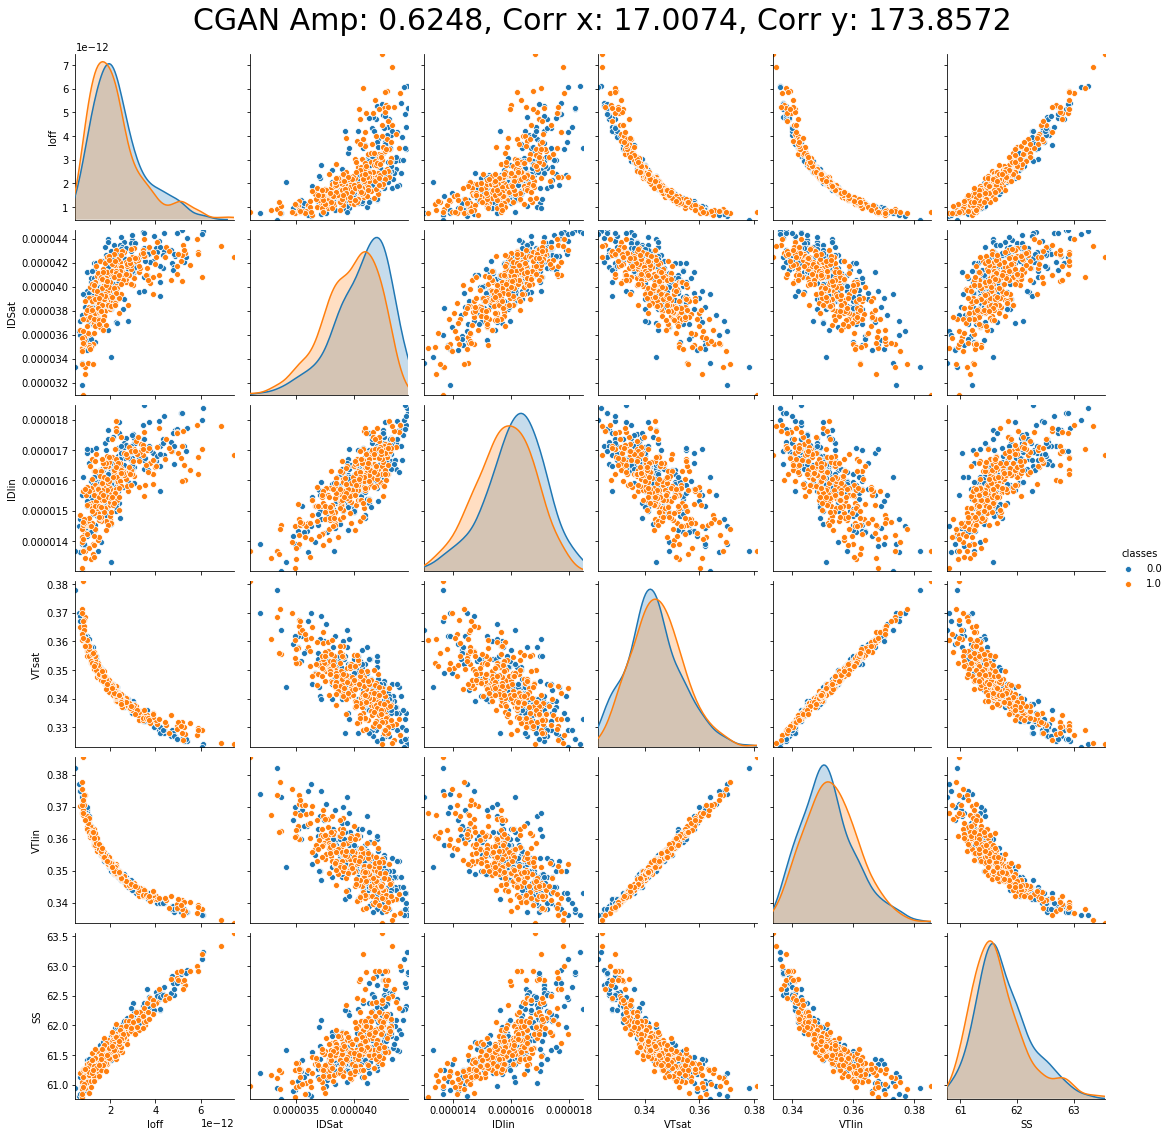

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
minimum y value for each varaible: [5.42962285e-13 3.18052754e-05 1.33150262e-05 3.24000000e-01
 3.36000000e-01 6.07570564e+01 0.00000000e+00]
maximum y value for each varaible: [6.20728285e-12 4.50700000e-05 1.82653110e-05 3.75255557e-01
 3.79207342e-01 6.30910000e+01 1.00000000e+00]
X input [ 0.55654727 80.91905766 80.56986979  1.          0.        ]


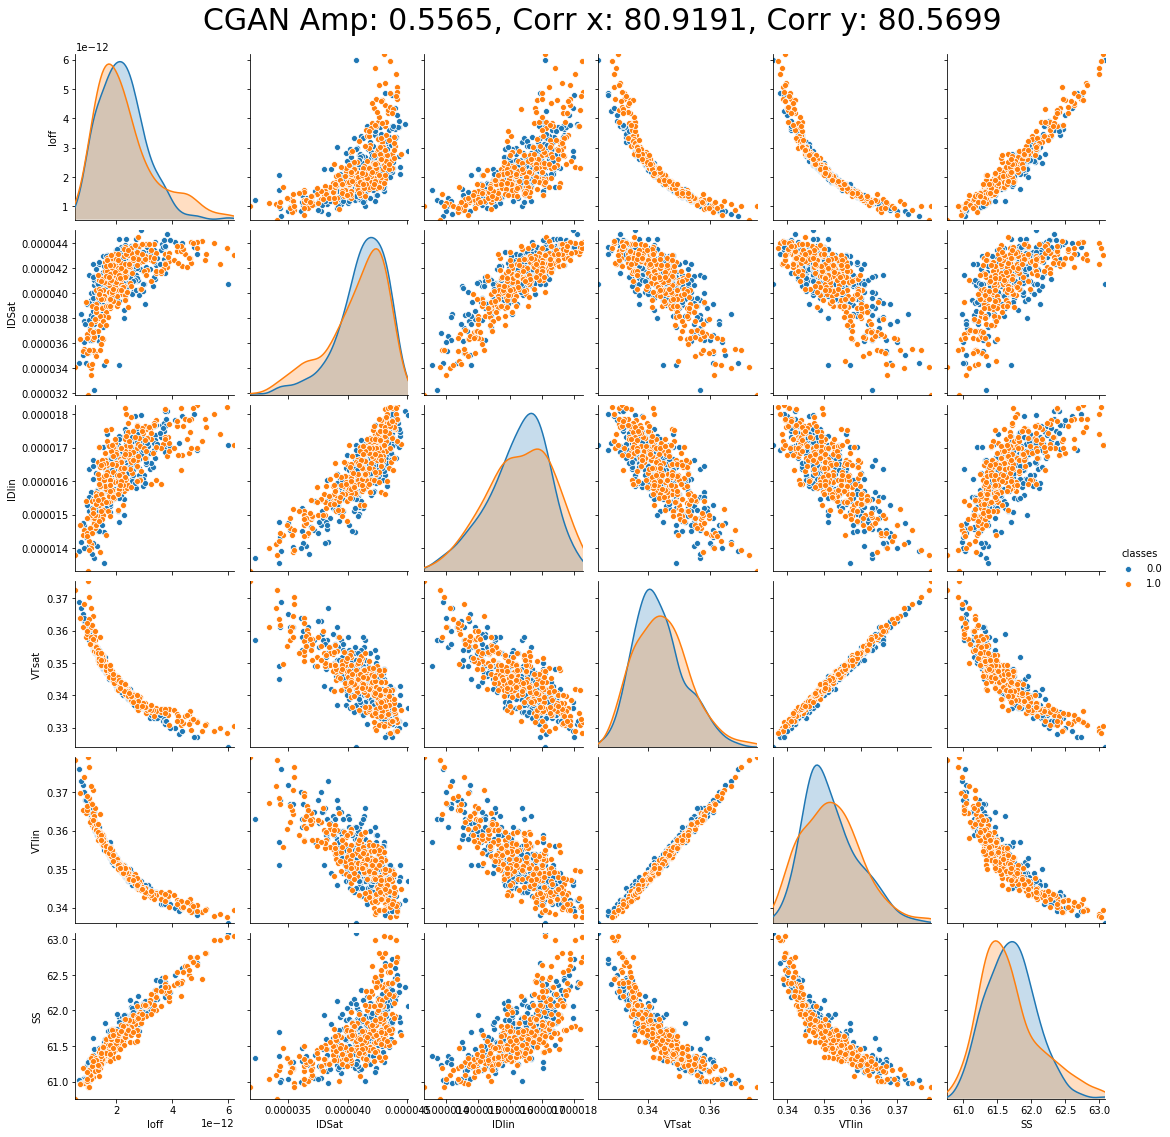

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
minimum y value for each varaible: [7.18100000e-13 3.26966207e-05 1.33044057e-05 3.25657413e-01
 3.35434382e-01 6.08530000e+01 0.00000000e+00]
maximum y value for each varaible: [7.90523042e-12 4.46500000e-05 1.87237938e-05 3.68000000e-01
 3.74514425e-01 6.36451226e+01 1.00000000e+00]
X input [ 0.50466944 48.62398816 67.99380535  1.          0.        ]


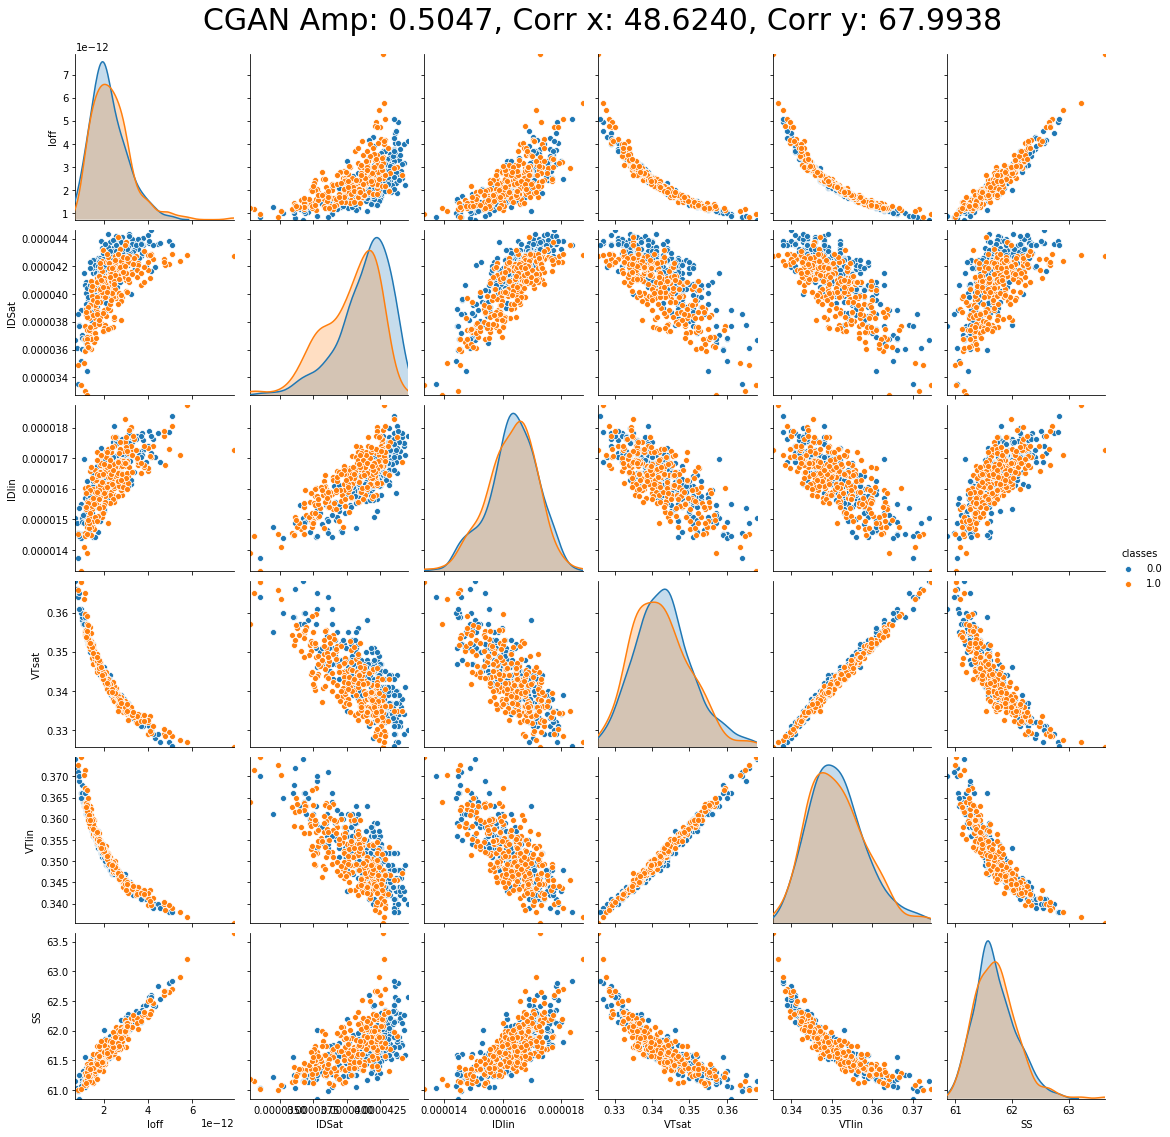

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
minimum y value for each varaible: [5.98800000e-13 3.16500000e-05 1.29000000e-05 3.23000000e-01
 3.34947769e-01 6.08810000e+01 0.00000000e+00]
maximum y value for each varaible: [6.82612366e-12 4.45500000e-05 1.83012535e-05 3.74093273e-01
 3.78303092e-01 6.32832149e+01 1.00000000e+00]
X input [ 0.56045148 25.42868151 69.39740975  1.          0.        ]


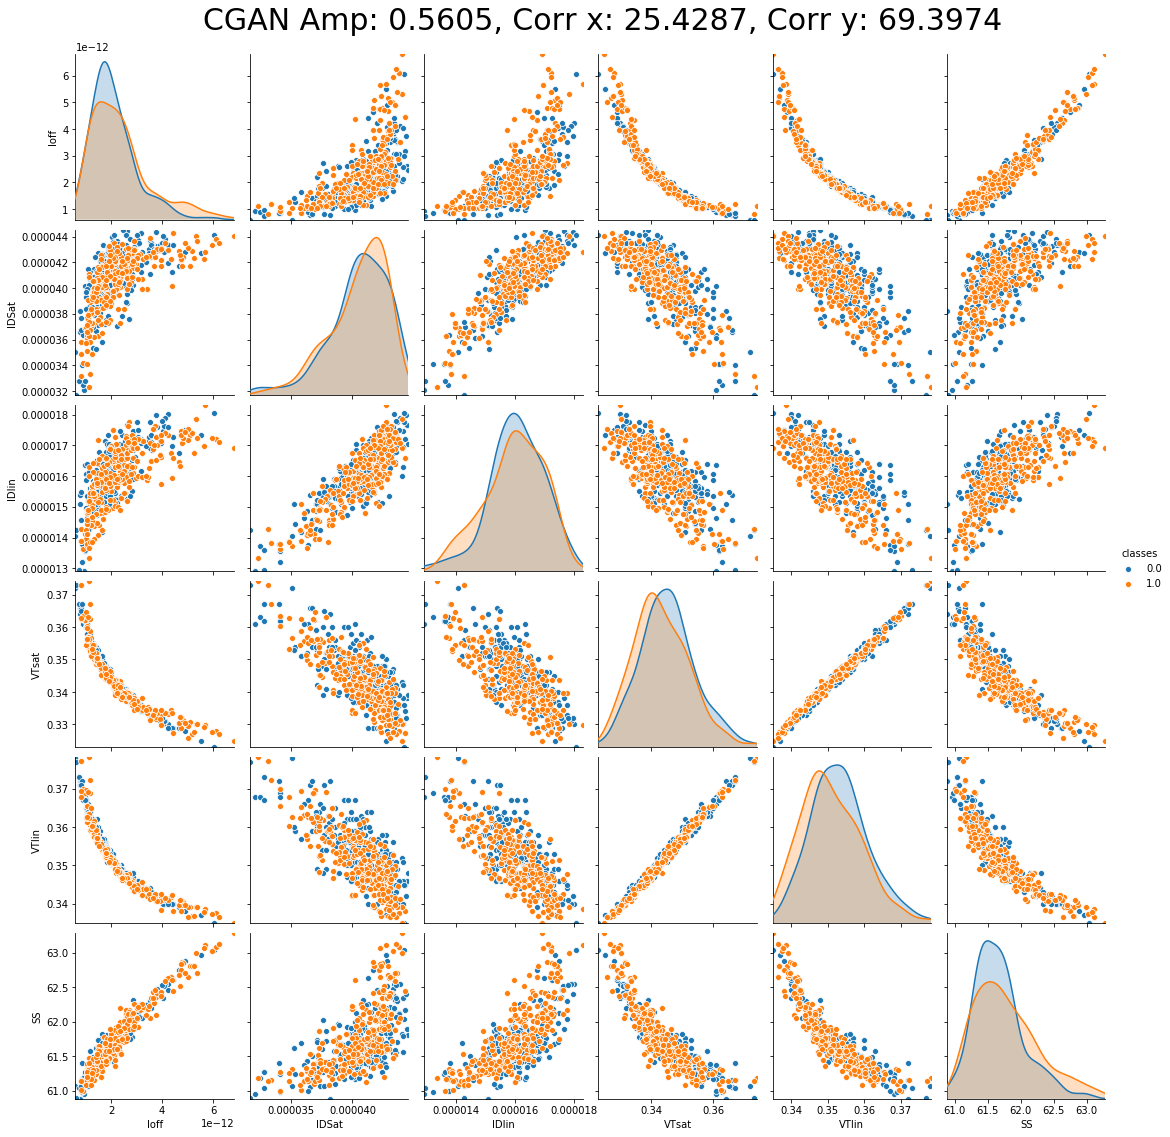

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
minimum y value for each varaible: [3.02200000e-13 2.80400000e-05 1.15000000e-05 3.21240113e-01
 3.35000000e-01 6.08140000e+01 0.00000000e+00]
maximum y value for each varaible: [8.15029140e-12 4.49600000e-05 1.83400000e-05 3.94000000e-01
 3.97000000e-01 6.37994038e+01 1.00000000e+00]
X input [ 0.63730798 69.14860261 65.33037708  1.          0.        ]


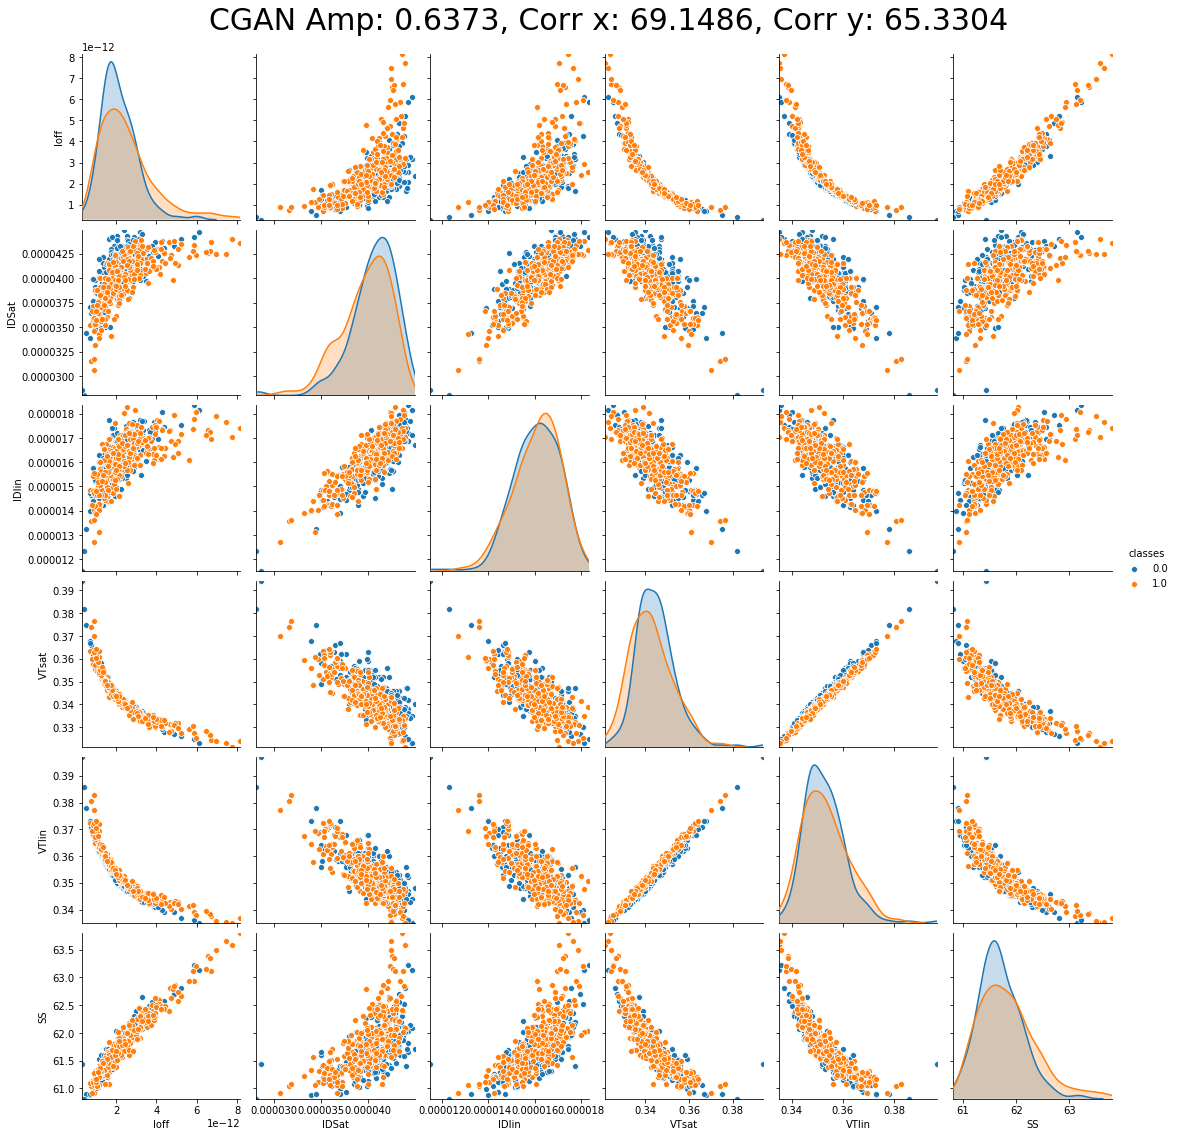

factor 5
1306 1556
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.60200000e-12 4.05422281e-05 1.58000000e-05 3.33527379e-01
 3.42897626e-01 6.13550000e+01 0.00000000e+00]
maximum y value for each varaible: [3.01036220e-12 4.41813411e-05 1.76308989e-05 3.48171912e-01
 3.55271917e-01 6.20343709e+01 1.00000000e+00]
X input [ 0.15273618 23.32639122 51.25326965  1.          0.        ]


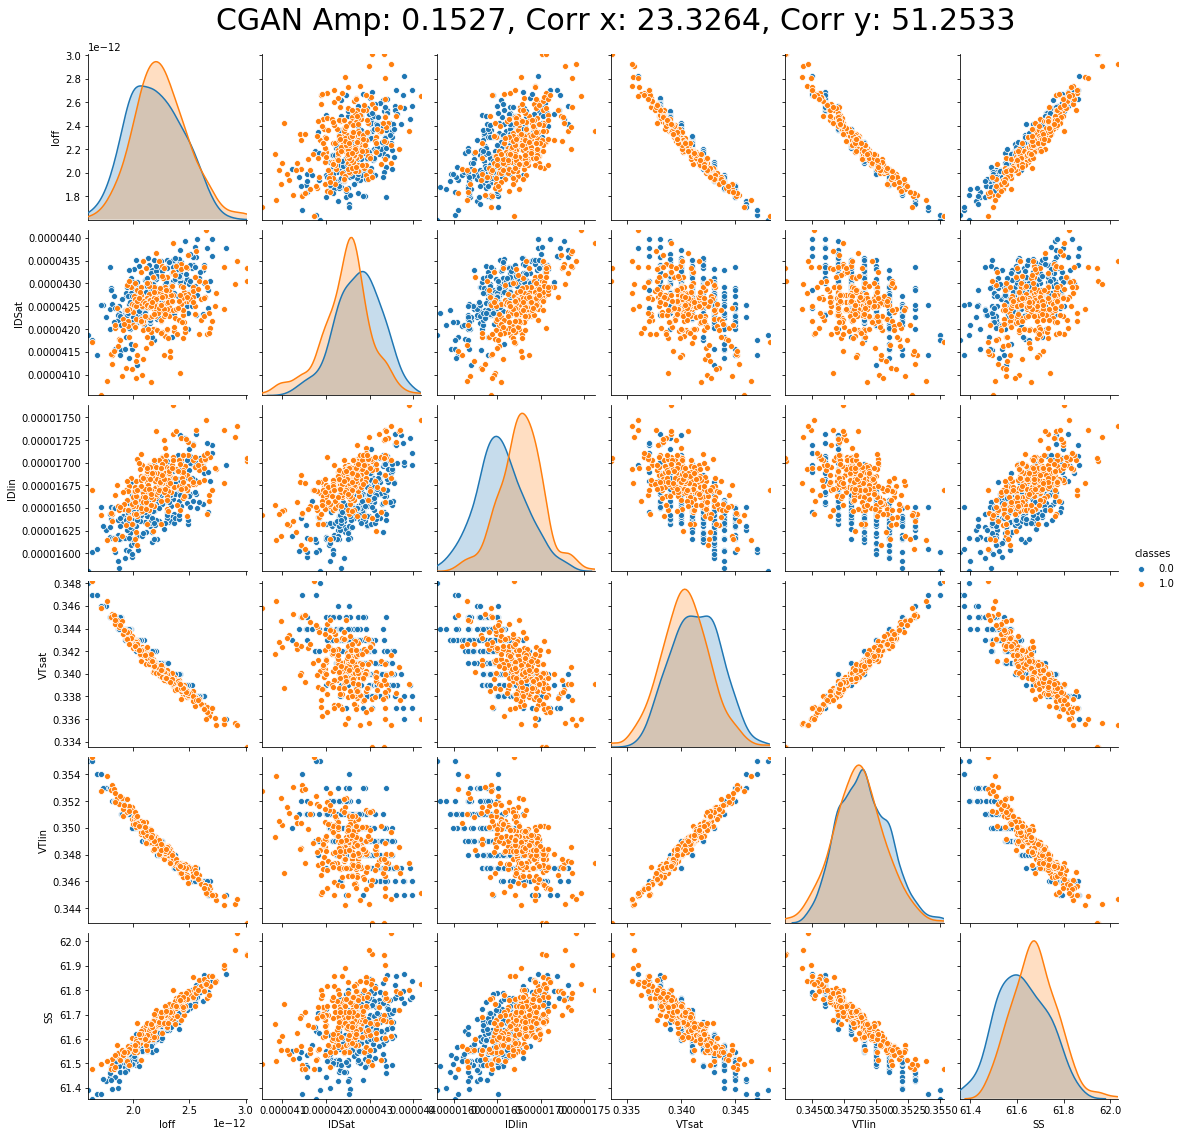

factor 6
1556 1806
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.28794147e-12 3.91500000e-05 1.53400000e-05 3.33000000e-01
 3.41751403e-01 6.12394584e+01 0.00000000e+00]
maximum y value for each varaible: [3.48000000e-12 4.45600000e-05 1.77753201e-05 3.53710480e-01
 3.59406467e-01 6.21800000e+01 1.00000000e+00]
X input [ 0.25925637 78.12653757 28.08679576  1.          0.        ]


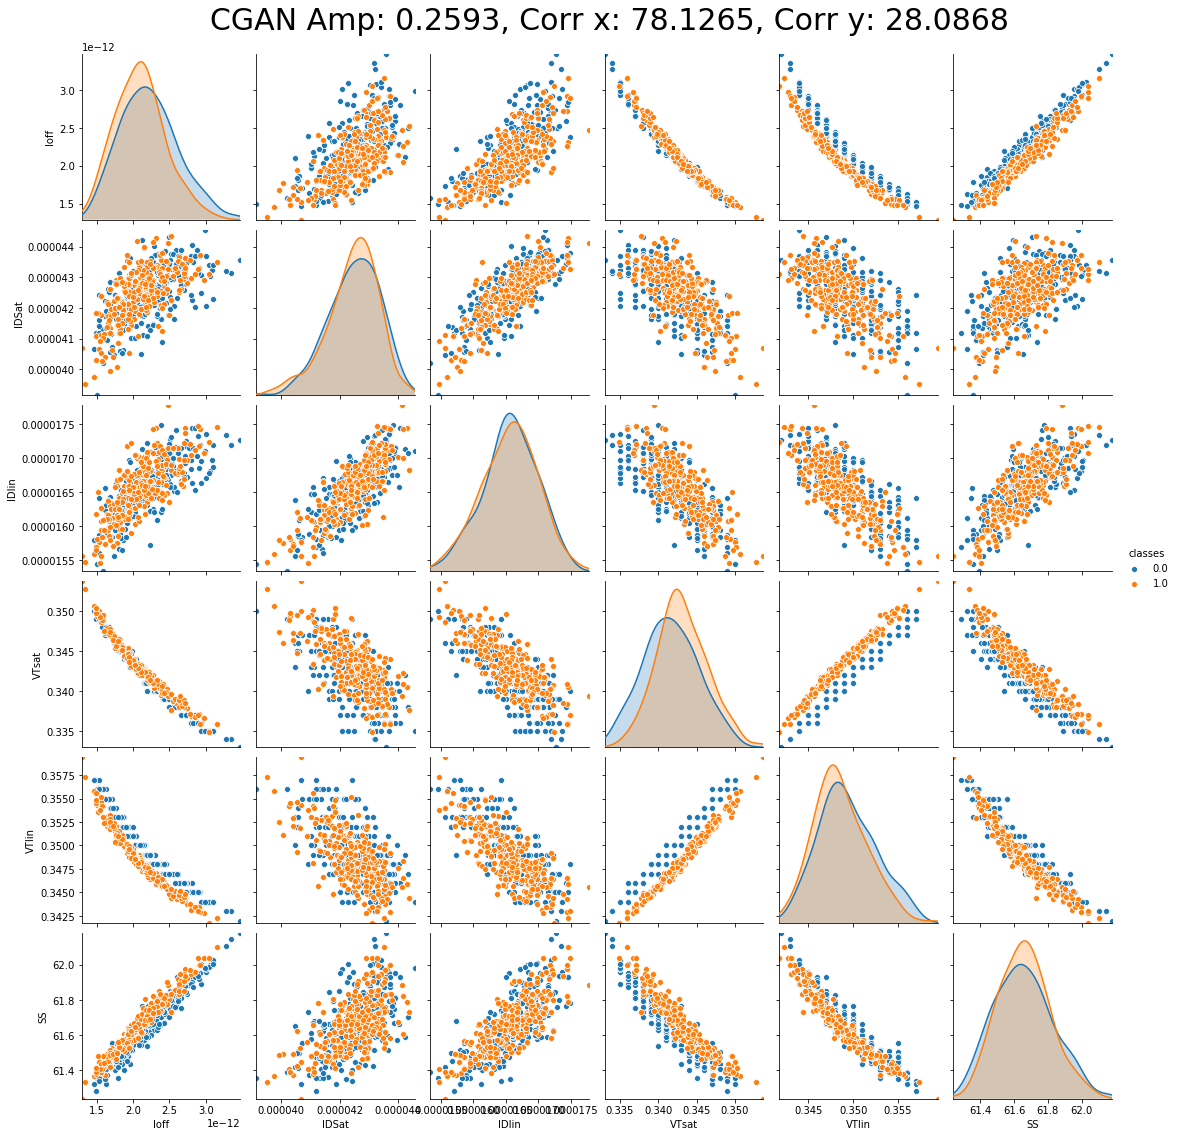

factor 7
1806 2056
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.45534392e-12 3.91500000e-05 1.53400000e-05 3.33000000e-01
 3.42000000e-01 6.12830000e+01 0.00000000e+00]
maximum y value for each varaible: [3.48000000e-12 4.45600000e-05 1.77317448e-05 3.50215473e-01
 3.57000000e-01 6.21800000e+01 1.00000000e+00]
X input [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


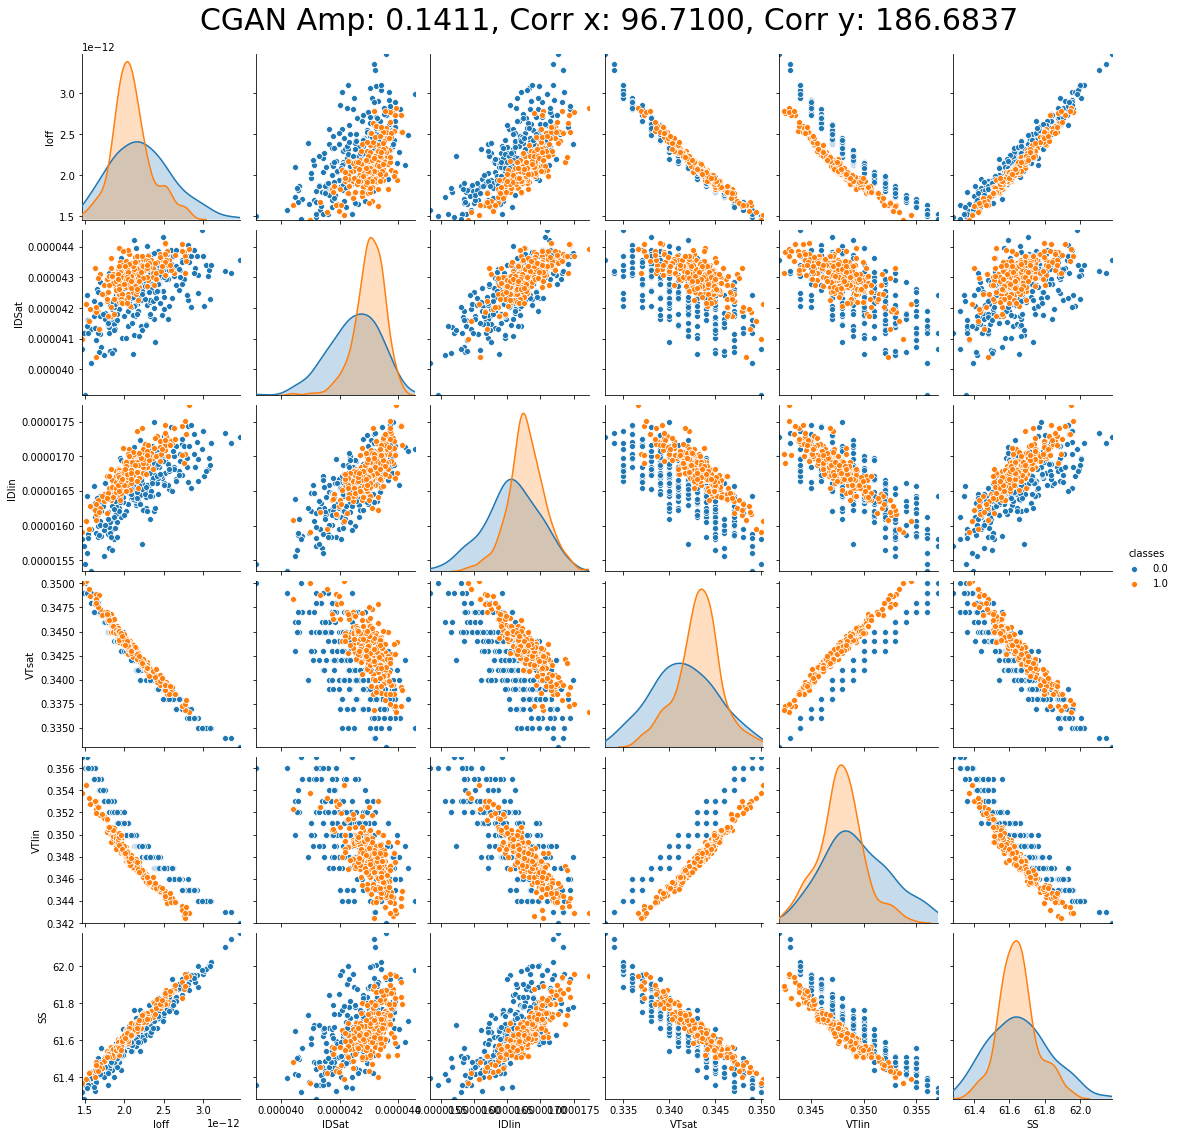

In [31]:
# gen_factor = 7
# test_sample_num = int(total_result_test.shape[0]/15)
# test_gan_matrix_plot = total_result_test[gen_factor * test_sample_num:(gen_factor+1)*test_sample_num]

for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = test_gen[factor * test_gen_sample_num:(factor+1)*test_gen_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)

#    print(df1_test)
    
        # min, max for generated Y value ( used for scatter plot limit standard )

    test_min_list = total_test_matrix_plot.min(axis=0)
    test_max_list = total_test_matrix_plot.max(axis=0)
    print("minimum y value for each varaible:", test_min_list)
    print("maximum y value for each varaible:", test_max_list)

    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}".format(X_test[0], X_test[1], X_test[2]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((test_min_list[i],test_max_list[i]))
        g.axes[i,i].set_ylim((test_min_list[i],test_max_list[i]))
    plt.show()


    ### 파란색이 real 주황색이 generated

# 2. Same scale

minimum y value for each varaible: [3.0220e-13 2.8040e-05 1.1500e-05 3.2300e-01 3.3500e-01 6.0765e+01]
maximum y value for each varaible: [6.1180e-12 4.5070e-05 1.8470e-05 3.9400e-01 3.9700e-01 6.3242e+01]
minimum y value for each varaible: [5.42962285e-13 3.06296228e-05 1.26885756e-05 3.21240113e-01
 3.33635087e-01 6.07570564e+01]
maximum y value for each varaible: [8.15029140e-12 4.44965784e-05 1.87237938e-05 3.81009991e-01
 3.85519516e-01 6.37994038e+01]
factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
X input [  0.62484672  17.00743225 173.85718891   1.           0.        ]


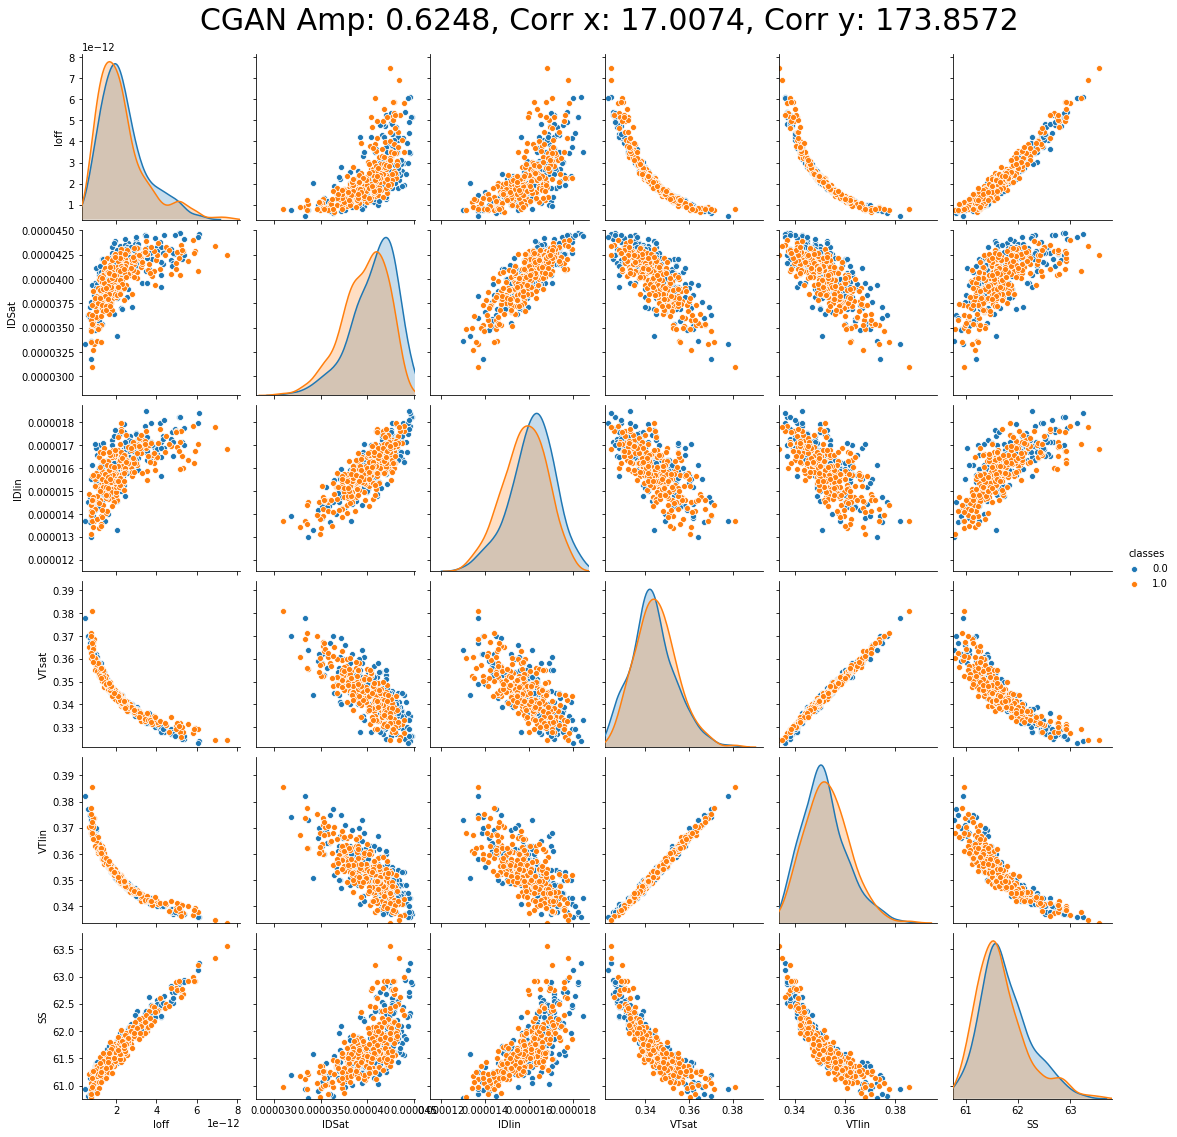

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
X input [ 0.55654727 80.91905766 80.56986979  1.          0.        ]


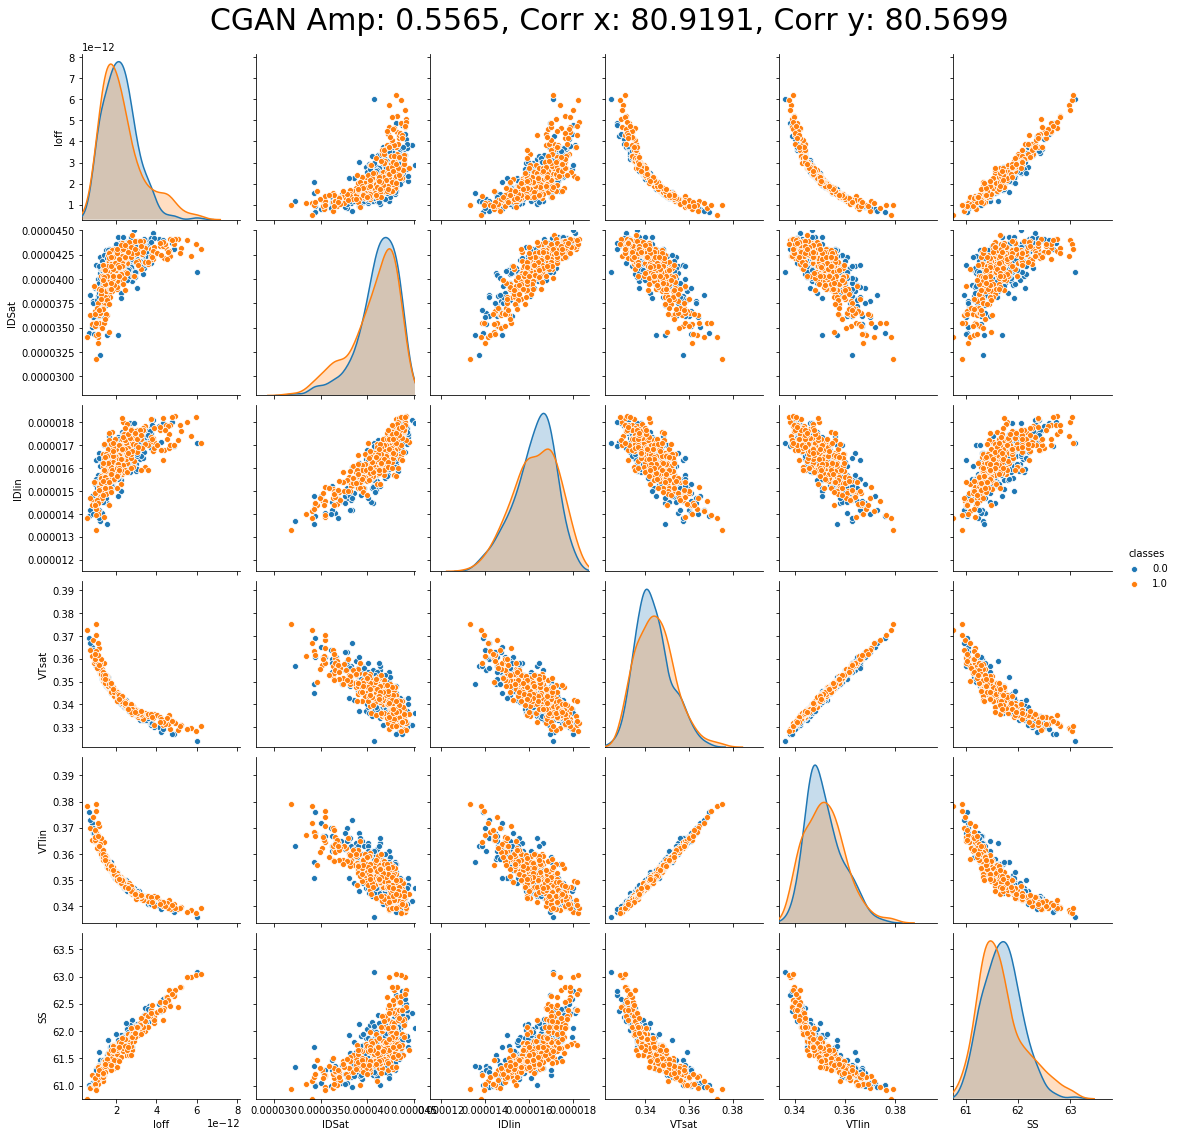

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
X input [ 0.50466944 48.62398816 67.99380535  1.          0.        ]


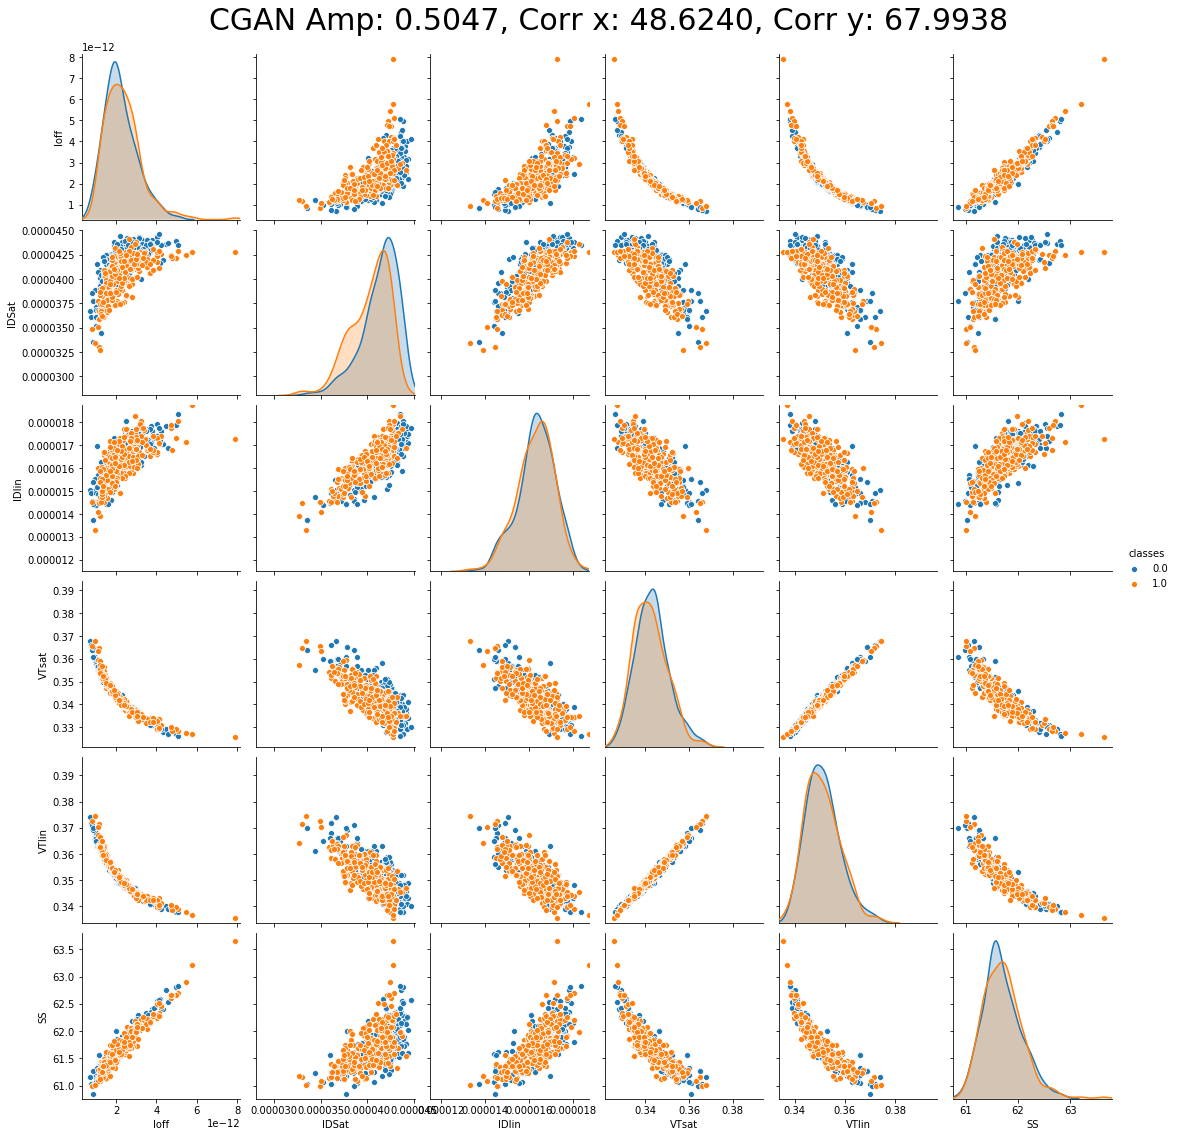

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
X input [ 0.56045148 25.42868151 69.39740975  1.          0.        ]


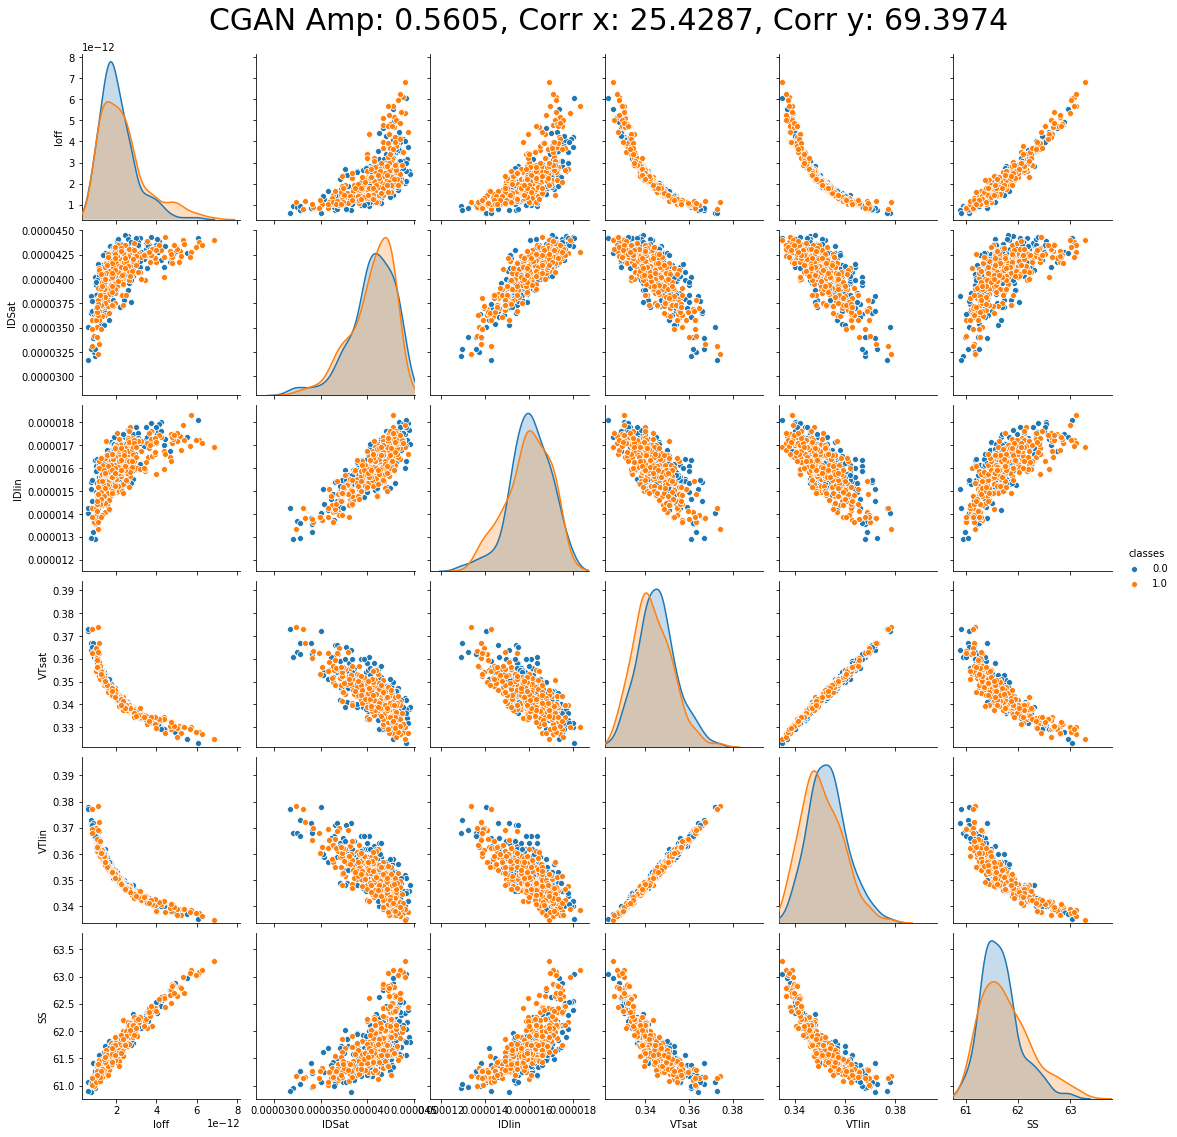

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
X input [ 0.63730798 69.14860261 65.33037708  1.          0.        ]


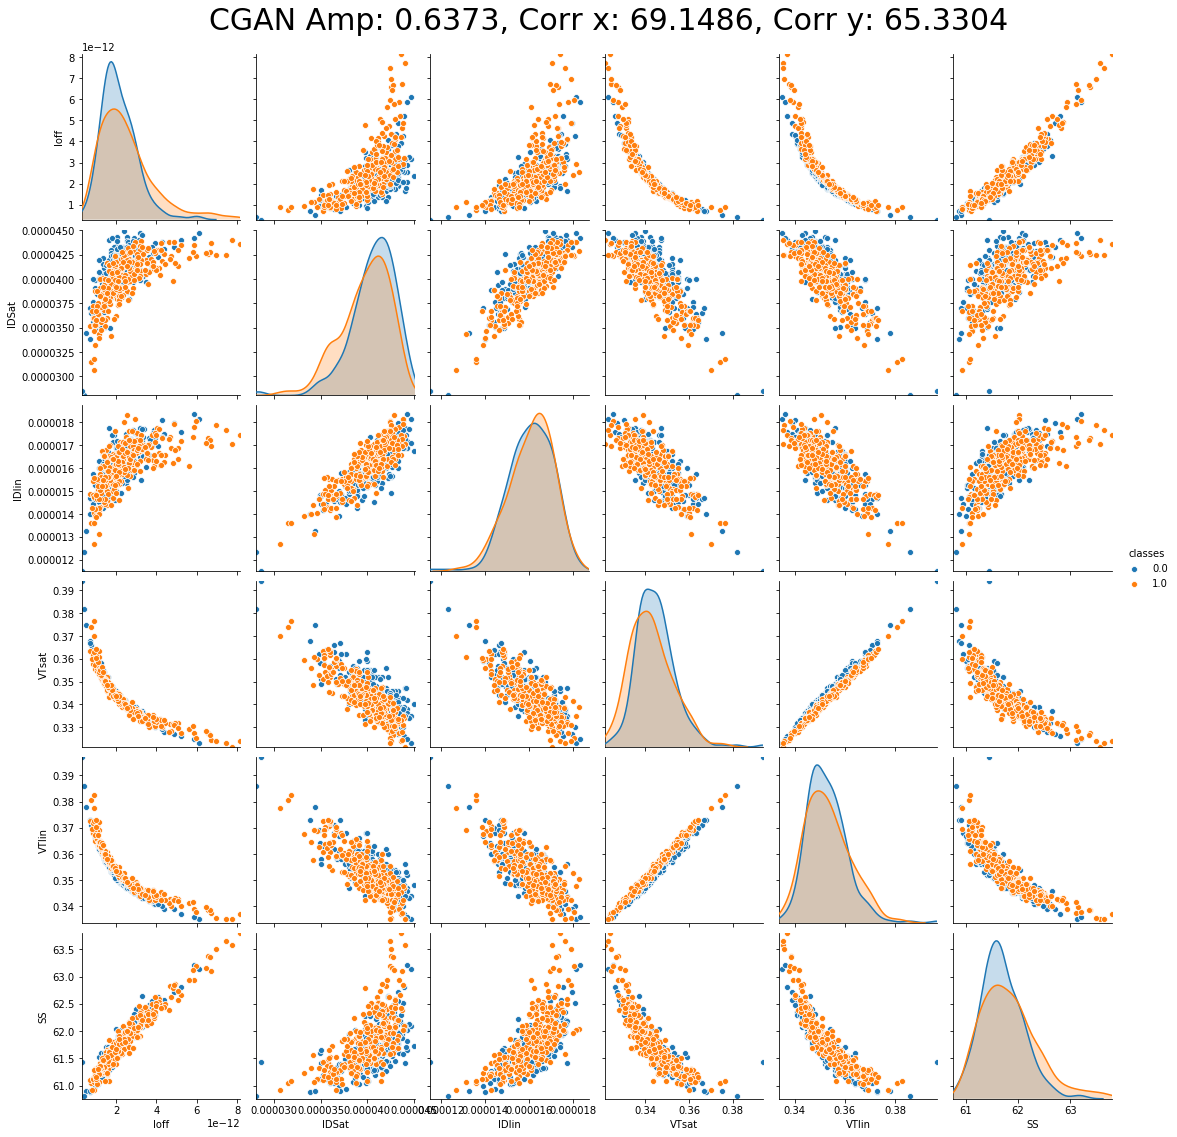

factor 5
1306 1556
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [ 0.15273618 23.32639122 51.25326965  1.          0.        ]


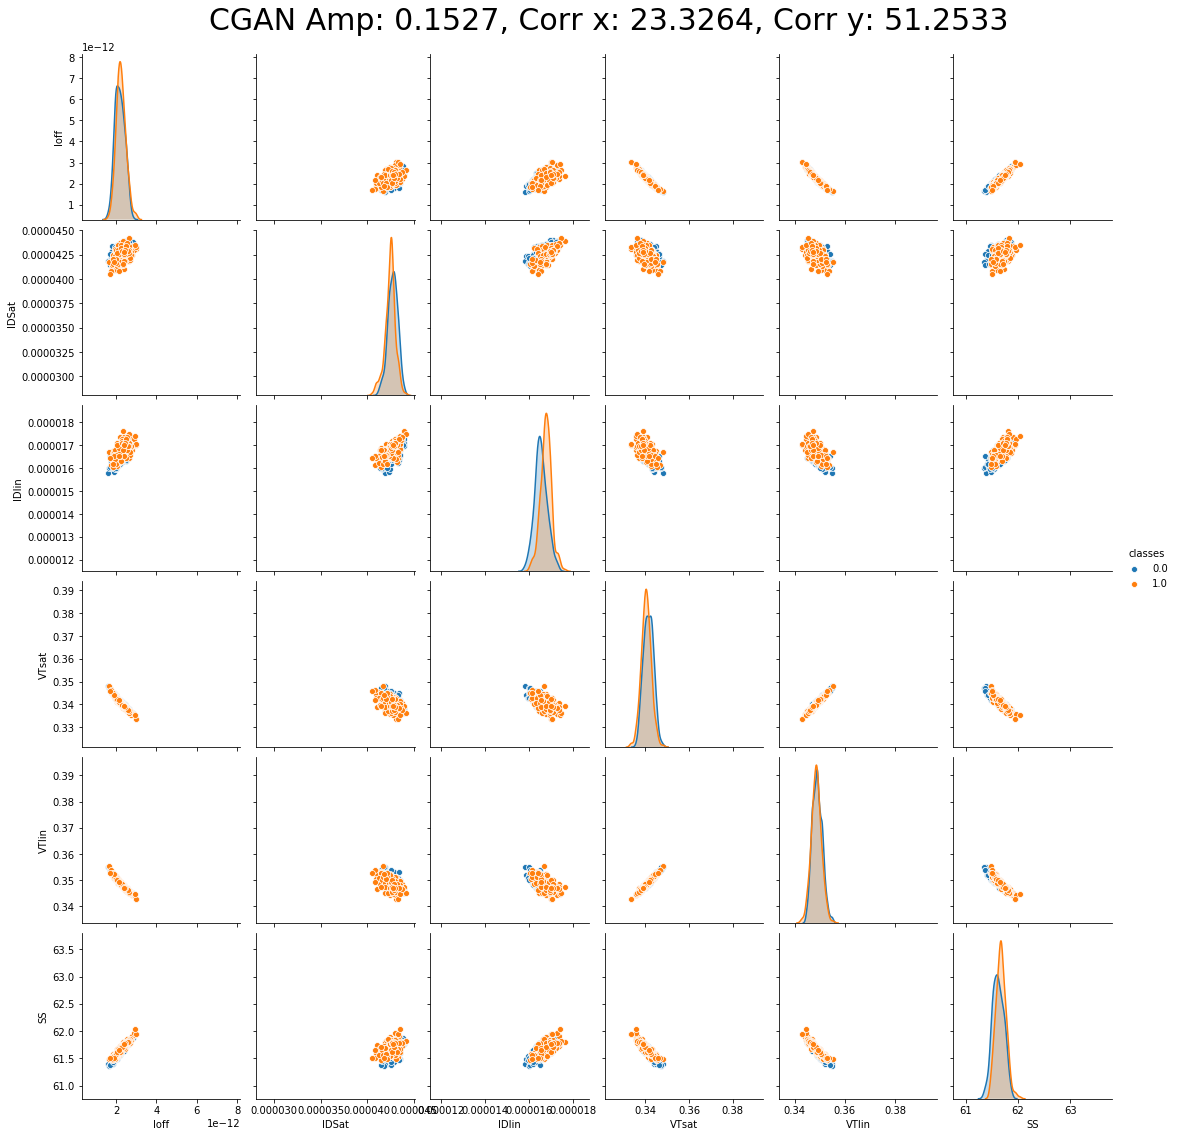

factor 6
1556 1806
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [ 0.25925637 78.12653757 28.08679576  1.          0.        ]


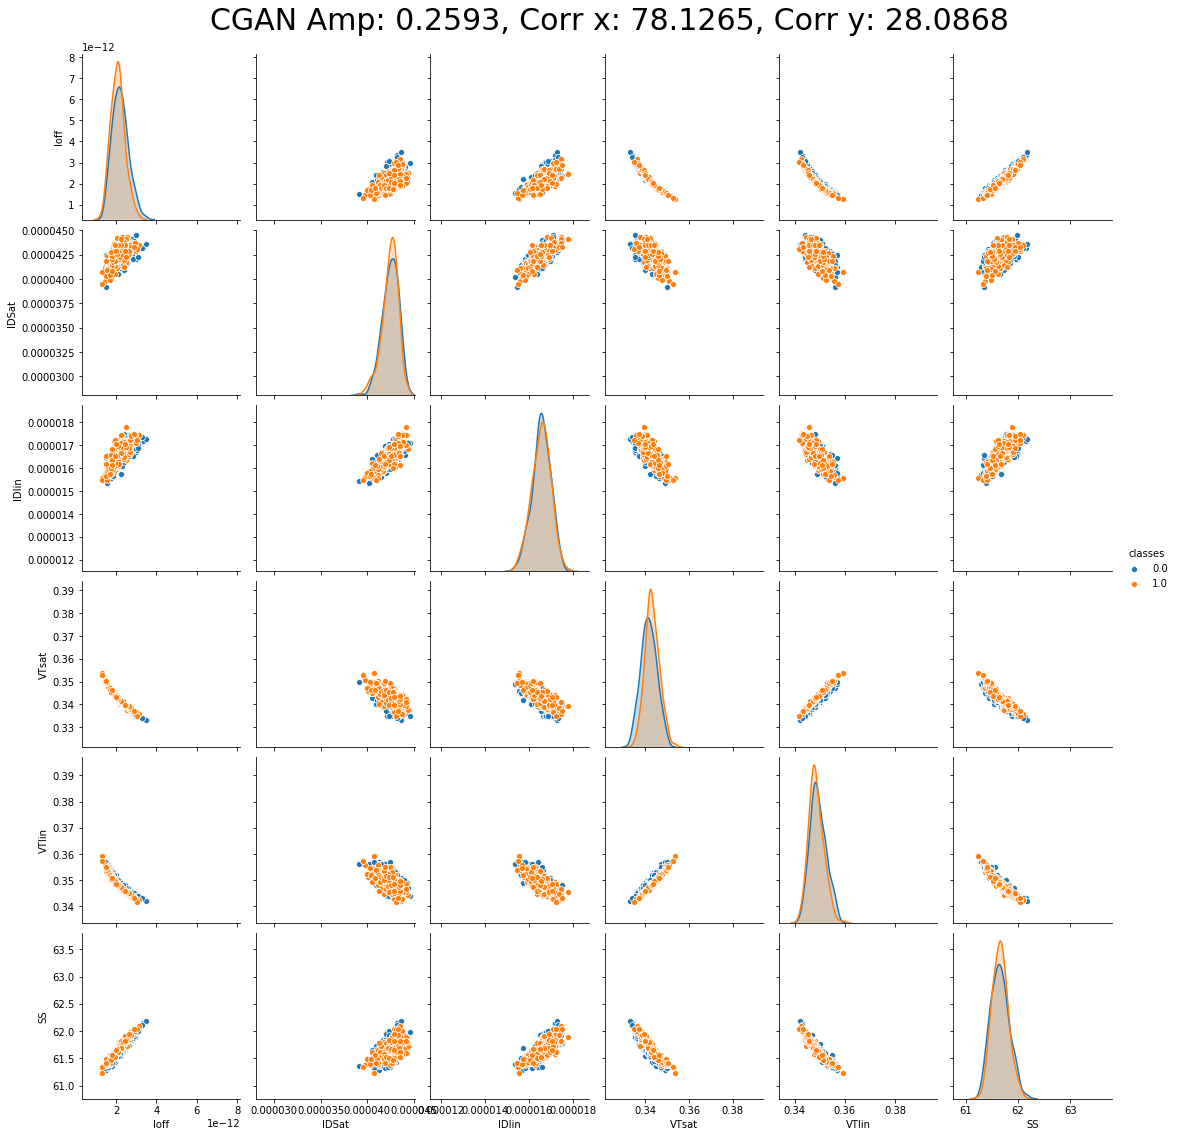

factor 7
1806 2056
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


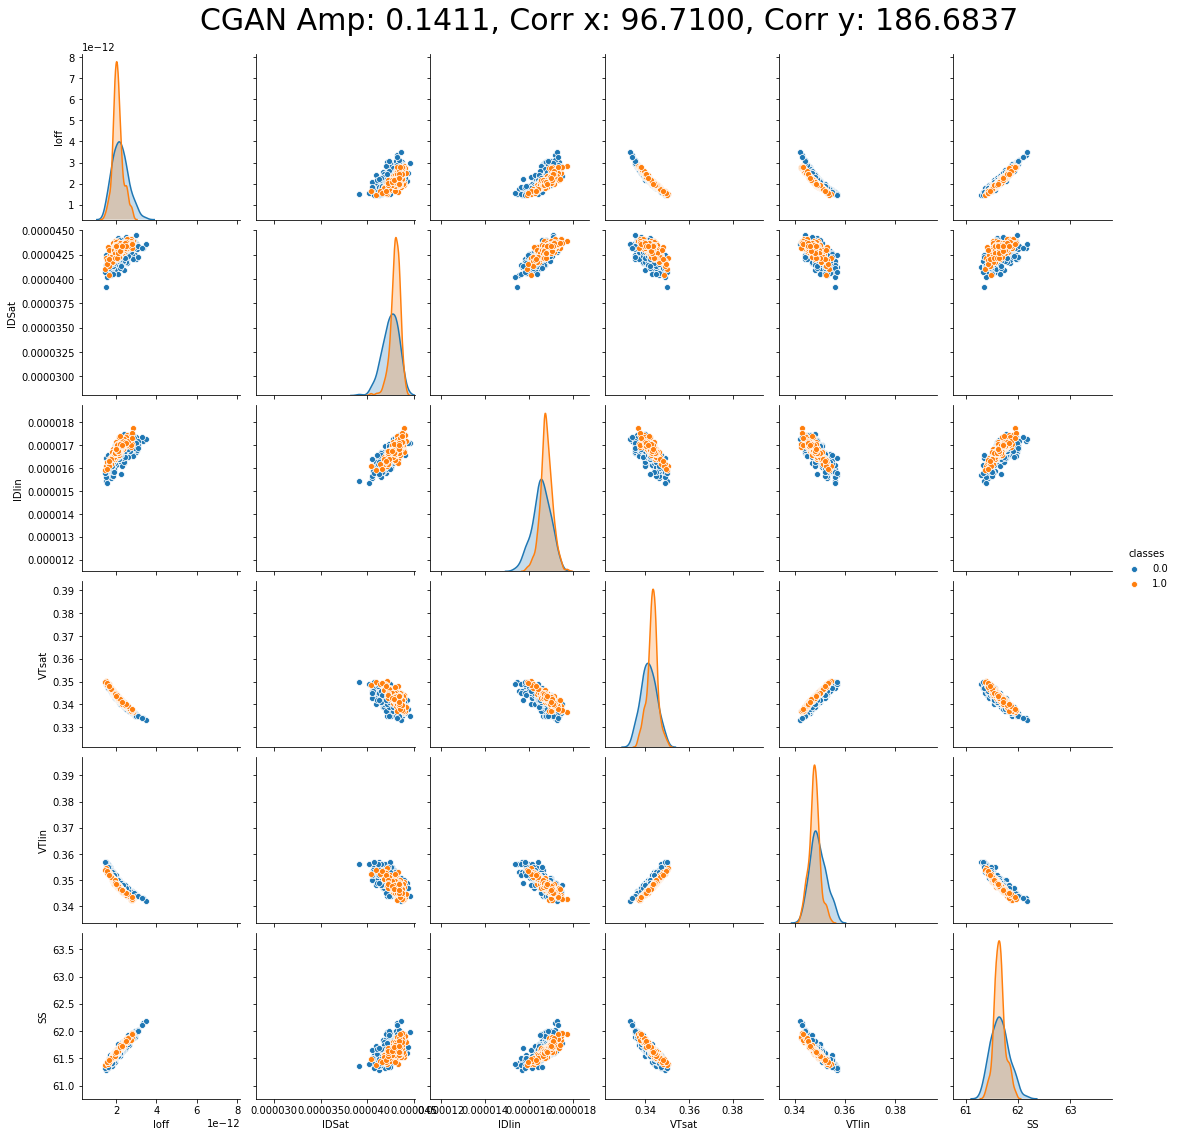

In [39]:

min1_per_out_v = test_real.min(axis=0)
max1_per_out_v = test_real.max(axis=0)
print("minimum y value for each varaible:", min1_per_out_v)
print("maximum y value for each varaible:", max1_per_out_v)

min2_per_out_v = test_gen.min(axis=0)
max2_per_out_v = test_gen.max(axis=0)
print("minimum y value for each varaible:", min2_per_out_v)
print("maximum y value for each varaible:", max2_per_out_v)

min_per_out_v = []
max_per_out_v = []

for i in range(6):
    min_per_out_v.append(min1_per_out_v[i] if min1_per_out_v[i] < min2_per_out_v[i] else min2_per_out_v[i])
    max_per_out_v.append(max1_per_out_v[i] if max1_per_out_v[i] > max2_per_out_v[i] else max2_per_out_v[i])

    
for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = test_gen[factor * test_gen_sample_num:(factor+1)*test_gen_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)
    
#     print(np.min(test_min_list))
#     print(np.max(test_max_list, axis=1))
    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}".format(X_test[0], X_test[1], X_test[2]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((min_per_out_v[i], max_per_out_v[i]))
        g.axes[i,i].set_ylim((min_per_out_v[i], max_per_out_v[i]))
    plt.show()


    ### 파란색이 real 주황색이 generated